# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [24]:
import pandas as pd #импортируем библиотеку
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep ='\t') #прочитаем csv-файл



In [25]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [27]:
print(data.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

In [28]:
print(data.isna().sum()) #количество пропущенных значений в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


last_price-изменить формат на int
first_day_exposition- необходимо заменить object нa тип datetime
ceiling_height- есть пропущенные значения
floors_total - необходимо заменить на int , есть пропущенные значения
living_area-есть пропущенные значения
is_apartment-есть пропущенные значения, bool
kitchen_area- есть пропущенные значения
balcony- int, есть пропущенные значения
locality_name - есть пропущенные значения(их оставим без изменений, тк неясна причина пропусков+их немного)
airports_nearest - есть пропущенные значения(не ясна причина пропусков)
cityCenters_nearest  - есть пропущенные значения(не ясна причина пропусков)
parks_around3000  -  есть пропущенные значения(не ясна причина пропусков)
parks_nearest - есть пропущенные значения (не ясна причина пропусков)
 ponds_around3000 -  есть пропущенные значения(не ясна причина пропусков)
days_exposition -  есть пропущенные значения


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

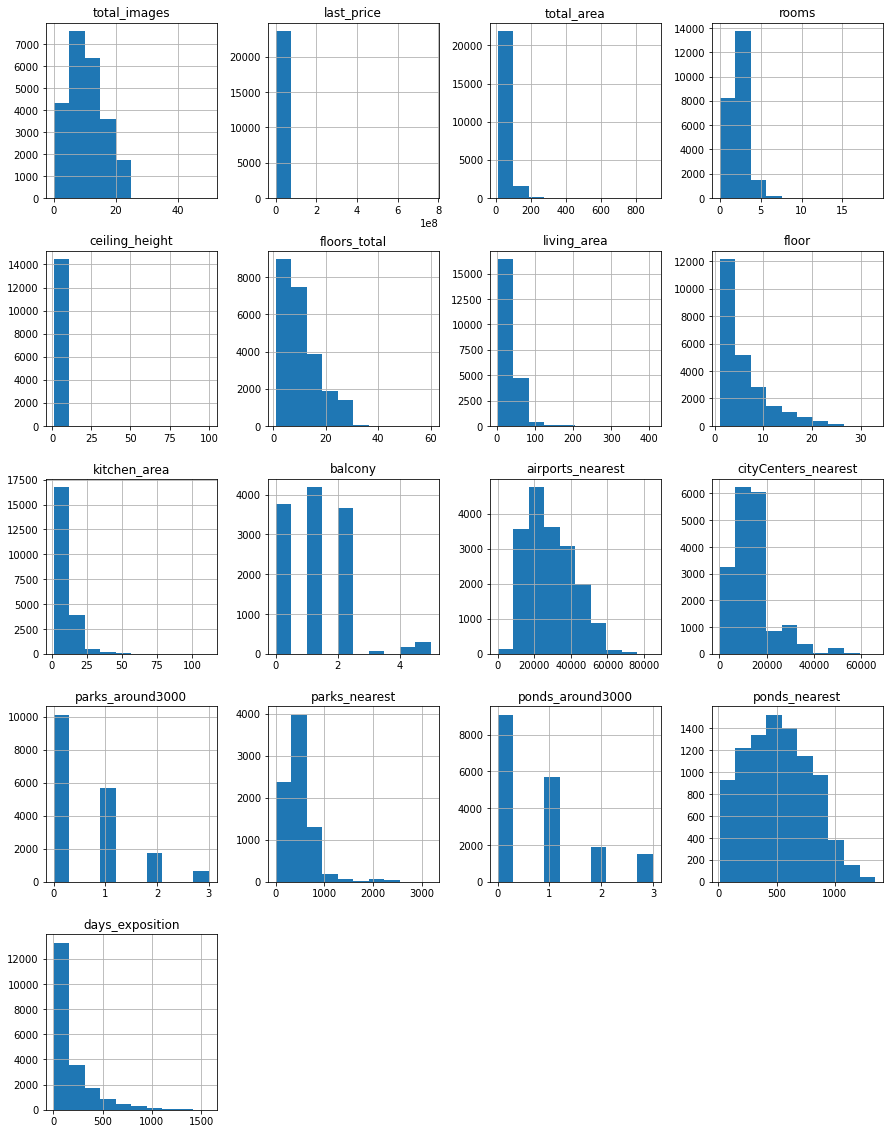

In [29]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [38]:
#поменяем тип столбца
data['last_price']=data['last_price'].astype('int')

#поменяем формат столбца
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#заменим пропуски в столбце на медианные значения, устойчивы к выбросам(которые есть в этом столбце)
median_ceiling_height = data.groupby('cityCenters_nearest')['ceiling_height'].transform('median')
data['ceiling_height'].fillna(median_ceiling_height, inplace = True)
median_ceiling_height = data.groupby('locality_name')['ceiling_height'].transform('median')
data['ceiling_height'].fillna(median_ceiling_height, inplace = True)


#заменим пропущенные значения 
coefic_living_area = (data['living_area']/data['total_area']).mean()
data['living_area'].fillna(coefic_living_area*data['total_area'], inplace = True)


#изменим тип, пропуски заменим на False
data['is_apartment']=data['is_apartment'].fillna(False)
data['is_apartment']=data['is_apartment'].astype('bool')


#заменим пропущенные значения
coefic_kitchen_area = (data['kitchen_area']/data['total_area']).mean()
data['kitchen_area'].fillna(coefic_kitchen_area* data['total_area'], inplace = True)


#заменим тип и пропущенные значения
data['balcony']= data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

#заменим пропуски медианными значениями
median_days_exposition= data.groupby('first_day_exposition')['days_exposition'].transform('median')
data['days_exposition'].fillna(median_days_exposition, inplace = True)

median_cityCenters_nearest= data.groupby('locality_name')['cityCenters_nearest'].transform('median')
data['cityCenters_nearest'].fillna(median_cityCenters_nearest, inplace = True)

median_airports_nearest= data.groupby('locality_name')['airports_nearest'].transform('median')
data['airports_nearest'].fillna(median_airports_nearest, inplace = True)


   Причинами, приводящими к появлению пропусков, являются невозможность получения или обработки(в т.ч. повреждение носителей информации), искажение или сокрытие информации(т.е. человеческий фактор),в нашем случае-продавец не указал количество балконов из-за из отсутствия, в столбце is_apartment пропущено более половины значений, возможно из-за недавнего появления аппартаментов.
   В столбцах дата фрейма -floors_total, locality_name, airports_nearest, cityCenters_nearest ,parks_around3000 ,parks_nearest, ponds_around3000 ,ponds_nearest, значения пропущены, не зависят от известных нам значений,не известна и причина появления пропусков, поэтому оставляем без изменений
   Типы значений были изменены в столбцах- last_price, balcony для упрощения восприятия, тк это целые числа без дробной части; в столбце is_apartment, тк содержанием являются булевские значения- True, False; в столбце first_day_exposition, тк время не указано.
   

In [31]:
#удалим строки с пропущенными значениями, которые составляют менее 1% от общего количества значений
data = data.dropna(subset=['floors_total', 'locality_name', 'kitchen_area', 'days_exposition']) 

In [32]:
q1 = data['airports_nearest'].quantile(0.25)
q3 = data['airports_nearest'].quantile(0.75)
iqr = q3 - q1
lower_line = q1 - 1.5 * iqr
upper_line = q1 + 1.5 * iqr
data = data[(data['airports_nearest']>lower_line)&(data['airports_nearest']<upper_line)]

In [33]:
median = data['ceiling_height'].median()
q1 = data['ceiling_height'].quantile(0.25)
q3 = data['ceiling_height'].quantile(0.75)
iqr = q3 - q1
lower_line1 = q1 - 1.5 * iqr
upper_line1 = q1 + 1.5 * iqr
data[(data['ceiling_height']<lower_line1)&(data['ceiling_height']>upper_line1)] = median

In [34]:
#заменим аномально высокие значения дата высоты потолков(ссылаясь на опечатку)
#удалим аномально низкие значения (менее 2 метров)
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10
data = data[(data['ceiling_height'] > 2)]

In [35]:
#оставим только название населенных пунктов, чтобы избавиться от всех неявных дубликатов
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок станции ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')


In [36]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Петергоф', 'Пушкин', 'Колпино',
       'Металлострой', 'Павловск', 'Красное Село', 'Понтонный',
       'Стрельна', 'Александровская', 'Парголово', 'Ломоносов',
       'Сапёрный'], dtype=object)

### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
#цена одного квадратного метра;
data['price_metr'] = data['last_price']/ data['total_area']

#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday_public'] = data['first_day_exposition'].dt.weekday

#месяц публикации объявления
data['month_public'] = data['first_day_exposition'].dt.month

#год публикации объявления
data['year_public'] = data['first_day_exposition'].dt.year

#тип этажа квартиры (значения — «‎первый», «последний», «другой»)
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

    
#расстояние до центра города в километрах
data['km_cityCenters'] = round(data['cityCenters_nearest']/1000)


In [40]:
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000          64
parks_nearest           8755
ponds_around3000          64
ponds_nearest           7930
days_exposition            0
price_metr                 0
weekday_public             0
month_public               0
year_public                0
floor_category             0
km_cityCenters             0
dtype: int64


### Проведите исследовательский анализ данных

count    16192.000000
mean        64.264077
std         40.156483
min         12.000000
25%         41.600000
50%         54.700000
75%         74.000000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:title={'center':'Диаграмма общей площади'}, ylabel='Frequency'>

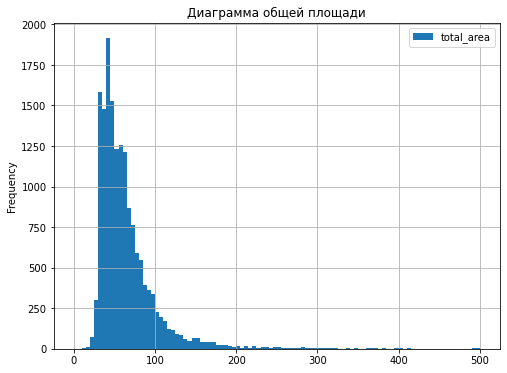

In [41]:
# изучим параметры объекта 'общая площадь'
print(data['total_area'].describe())
data.plot(y='total_area', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,500), title ='Диаграмма общей площади')

<AxesSubplot:>

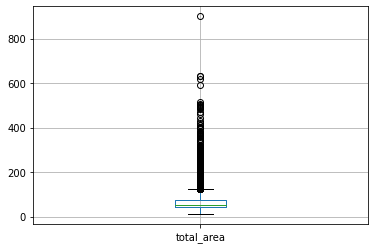

In [42]:
data.boxplot('total_area')

count    16192.000000
mean        36.937197
std         25.036717
min          2.000000
25%         20.000000
50%         31.000000
75%         44.000000
max        409.700000
Name: living_area, dtype: float64


<AxesSubplot:title={'center':'Диаграмма жилой площади'}, ylabel='Frequency'>

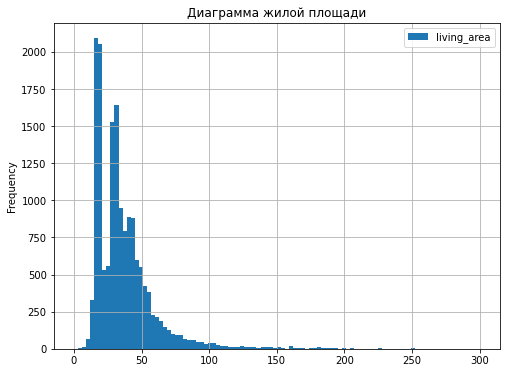

In [43]:
# изучим параметры объекта 'жилая площадь'
print(data['living_area'].describe())
data.plot(y='living_area', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,300), title ='Диаграмма жилой площади')

<AxesSubplot:>

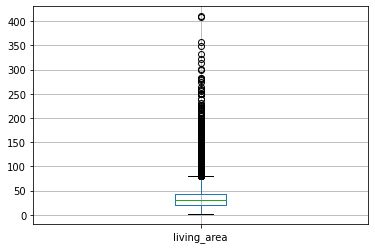

In [44]:
data.boxplot('living_area')

count    16192.000000
mean        11.119136
std          6.752693
min          1.300000
25%          7.119870
50%          9.774959
75%         12.500000
max        112.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:title={'center':'Диаграмма площади кухни'}, ylabel='Frequency'>

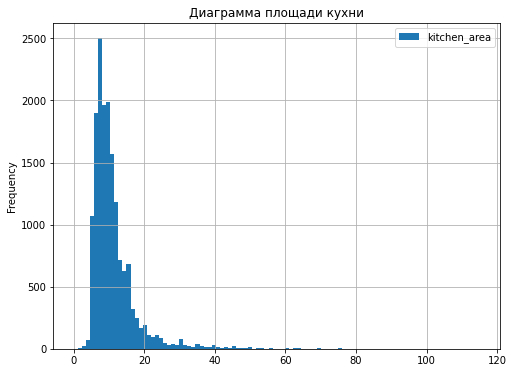

In [45]:
# изучим параметры объекта 'площадь кухни'
print(data['kitchen_area'].describe())
data.plot(y='kitchen_area', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,115), title ='Диаграмма площади кухни')

<AxesSubplot:>

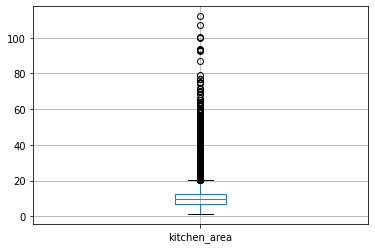

In [46]:
data.boxplot('kitchen_area')

count    1.619200e+04
mean     7.850699e+06
std      1.285592e+07
min      1.219000e+04
25%      4.050000e+06
50%      5.350000e+06
75%      7.950000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:title={'center':'Диаграмма цена объекта'}, ylabel='Frequency'>

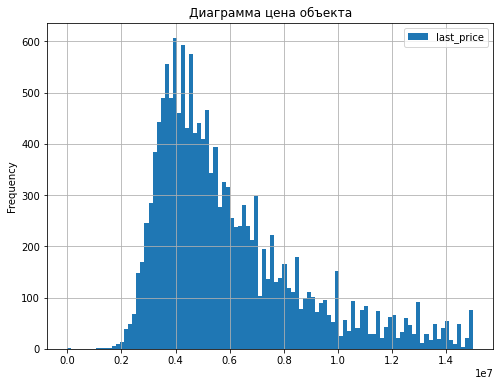

In [47]:
# изучим параметры объекта 'цена объекта'
print(data['last_price'].describe())
data.plot(y='last_price', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,15000000), title ='Диаграмма цена объекта')

<AxesSubplot:>

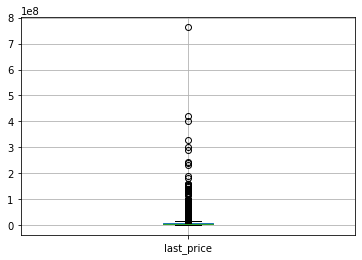

In [48]:
data.boxplot('last_price')

count    16192.000000
mean         2.157609
std          1.141569
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:title={'center':'Диаграмма количество комнат'}, ylabel='Frequency'>

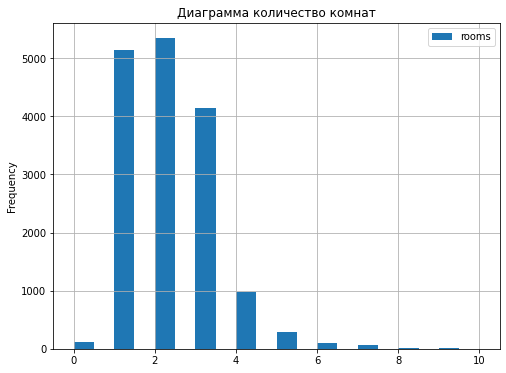

In [49]:
# изучим параметры объекта 'количество комнат'
print(data['rooms'].describe())
data.plot(y='rooms', kind='hist', bins = 20, grid = True, figsize =(8,6), range =(0,10), title ='Диаграмма количество комнат')


<AxesSubplot:>

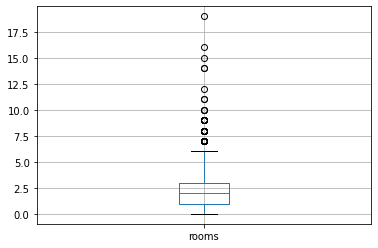

In [50]:
data.boxplot('rooms')

count    16192.000000
mean         2.748095
std          0.285263
min          2.260000
25%          2.560000
50%          2.700000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:title={'center':'Диаграмма высота потолков'}, ylabel='Frequency'>

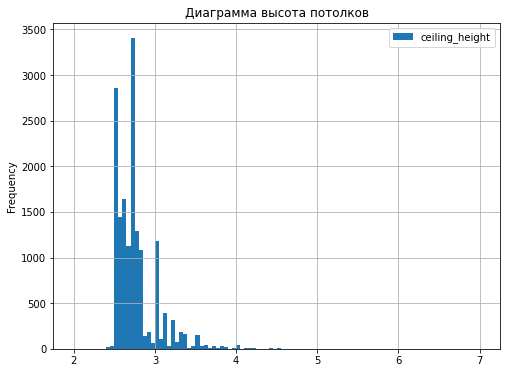

In [51]:
# изучим параметры объекта 'высота потолков'
print(data['ceiling_height'].describe())
data.plot(y='ceiling_height', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(2,7), title ='Диаграмма высота потолков')


<AxesSubplot:>

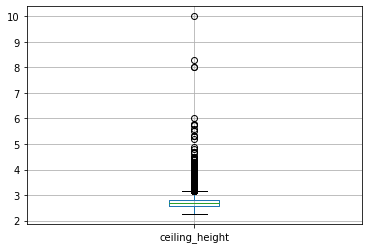

In [52]:
data.boxplot('ceiling_height')

count    16192.000000
mean         6.030138
std          4.827078
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


<AxesSubplot:title={'center':'Диаграмма этажа квартиры'}, ylabel='Frequency'>

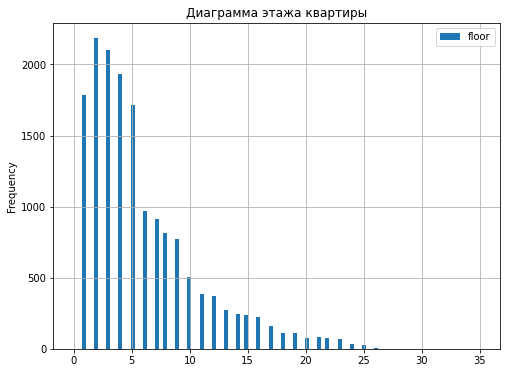

In [53]:
# изучим параметры объекта 'этаж квартиры'
print(data['floor'].describe())
data.plot(y='floor', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,35), title ='Диаграмма этажа квартиры')

<AxesSubplot:>

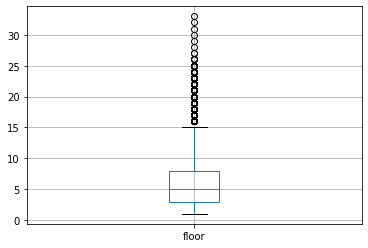

In [54]:
data.boxplot('floor')

count        3.000000
mean      5397.333333
std       5980.958647
min       1783.000000
25%       1945.500000
50%       2108.000000
75%       7204.500000
max      12301.000000
Name: floor_category, dtype: float64


<AxesSubplot:title={'center':'Гистограмма по типу этажа квартиры'}, xlabel='Значения', ylabel='Частота встречаемости'>

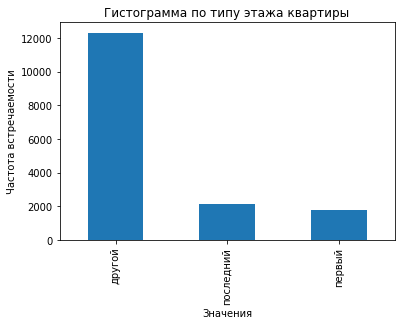

In [55]:
# изучим параметры объекта 'тип этажа квартиры'
counts = data['floor_category'].value_counts()
print(counts.describe())
counts.plot.bar(title='Гистограмма по типу этажа квартиры', xlabel='Значения', ylabel ='Частота встречаемости')


count    16192.000000
mean        10.991477
std          6.397459
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64


<AxesSubplot:title={'center':'Диаграмма общего количества этажей в доме'}, ylabel='Frequency'>

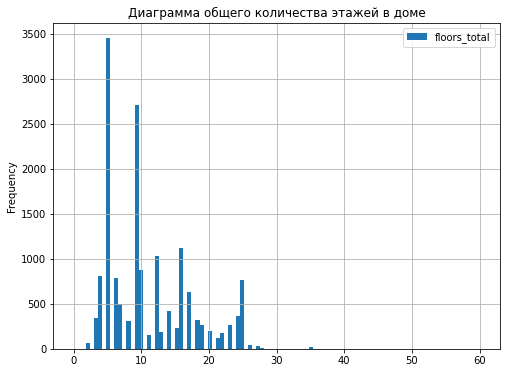

In [56]:
# изучим параметры объекта 'общее количество этажей в доме'
print(data['floors_total'].describe())
data.plot(y='floors_total', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,60), title ='Диаграмма общего количества этажей в доме')

<AxesSubplot:>

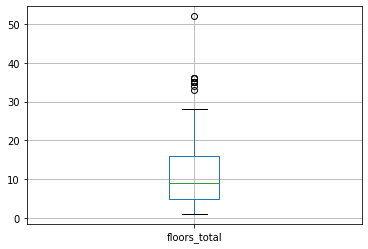

In [57]:
data.boxplot('floors_total')

count    16192.000000
mean     13150.315681
std       7395.809920
min        181.000000
25%       8460.000000
50%      12419.000000
75%      15577.500000
max      50125.000000
Name: cityCenters_nearest, dtype: float64


<AxesSubplot:title={'center':'Диаграмма расстояния до центра города в метрах'}, ylabel='Frequency'>

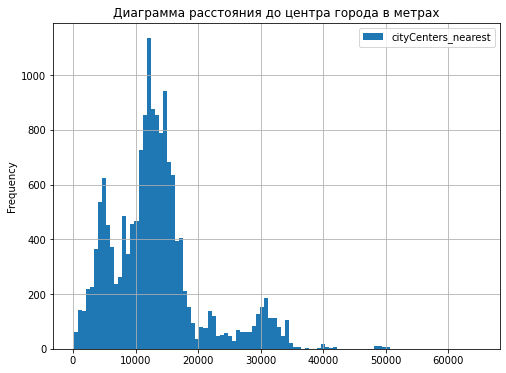

In [58]:
# изучим параметры объекта 'расстрояние до центра города в метрах'
print(data['cityCenters_nearest'].describe())
data.plot(y='cityCenters_nearest', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(100,65000), title ='Диаграмма расстояния до центра города в метрах')

<AxesSubplot:>

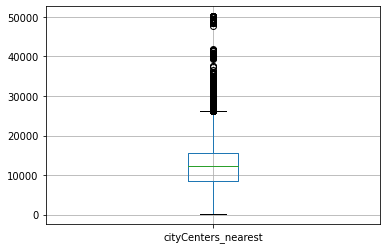

In [59]:
data.boxplot('cityCenters_nearest')

count    16192.000000
mean     26076.148962
std      10059.008235
min          0.000000
25%      17801.500000
50%      25048.000000
75%      34270.500000
max      46701.000000
Name: airports_nearest, dtype: float64


<AxesSubplot:title={'center':'Диаграмма расстояния до ближайшего аэропорта'}, ylabel='Frequency'>

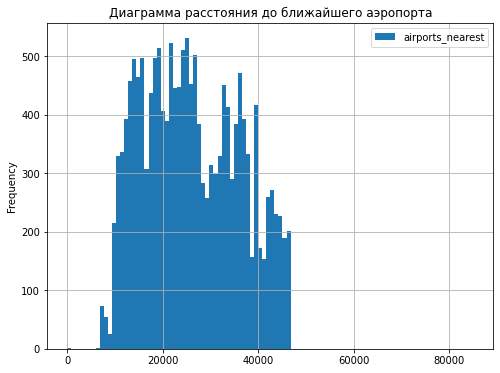

In [60]:
# изучим параметры объекта 'расстрояние до ближайшего аэропорта'
print(data['airports_nearest'].describe())
data.plot(y='airports_nearest', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,85000), title ='Диаграмма расстояния до ближайшего аэропорта')

<AxesSubplot:>

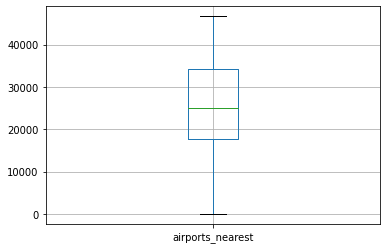

In [61]:
data.boxplot('airports_nearest')

count    7437.000000
mean      496.617722
std       348.720376
min         1.000000
25%       291.000000
50%       458.000000
75%       618.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:title={'center':'Диаграмма расстояния до ближайшего парка'}, ylabel='Frequency'>

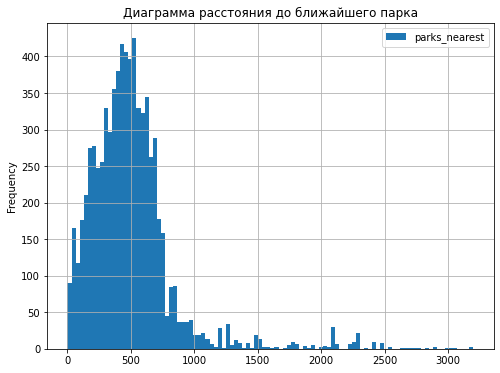

In [62]:
# изучим параметры объекта 'расстрояние до ближайшего парка'
print(data['parks_nearest'].describe())
data.plot(y='parks_nearest', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,3200), title ='Диаграмма расстояния до ближайшего парка')



<AxesSubplot:>

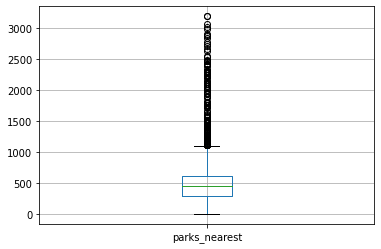

In [63]:
data.boxplot('parks_nearest')

count      12.000000
mean     1349.333333
std       309.029664
min       880.000000
25%      1157.750000
50%      1285.000000
75%      1624.500000
max      1849.000000
dtype: float64
count     31.000000
mean     522.322581
std      101.565541
min      226.000000
25%      485.500000
50%      535.000000
75%      570.500000
max      773.000000
dtype: float64


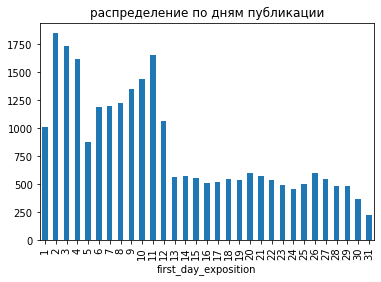

In [64]:
# изучим параметры объекта 'день и месяц публикации объявления'
month_exposition = data.groupby(data['first_day_exposition'].dt.month).size()
month_exposition.plot.bar(title = 'распределение по месяцам публикации')
print(month_exposition.describe())

day_exposition = data.groupby(data['first_day_exposition'].dt.day).size()
day_exposition.plot.bar(title = 'распределение по дням публикации')
print(day_exposition.describe())


1.В данных об общей площади значения колеблются от 14 до 900м^2. Средняя общая площадь равна 60 м^2. На диаграмме видим нормальное распределение.
2.В данных о жилой площади значения колеблются от 2 до 409м^2. Средняя жилая площадь равна 34м^2. Чаще всего встречаются квартиры с площадью 18 и 32м^2.
3.В данных о площади кухни значения колеблются от 1.3 до 112м^2. Средняя площадь кухни равна 10.4м^2. Чаще всего встречаются кухни с площадью 6, 8 ,9 и 10м^2. На гистограмме видим нормальное распределение.
4.Средняя стоимость на объекты 6.5 млн, на гистограмме видим нормальное распределение, видим аномально низкие значения- минимальная стоимость объекта 12190
5.В данных о количестве комнат данные колеблются от 1 до 19, среднее количество комнат =2. Чаще всего встречаются квартиры с 1, 2 и 3 комнатами.
6.В данных о высоте потолка значения колеблются от 2.2м до 5.7м.Средняя высота 2.7, чаще всего встречаются объекты с высотой потолка 2.5м и 2.7м
7.В данных об этаже объекта данные колеблются от 1 до 33. Средний этаж 6. Чаще всего встречаются квартиры на 1,2,3,4,5 этажах
8.В данных по типу этажа квартиры мы видим 3 группы- 'первый', 'последний', 'первый', чаще всего квартиры располагаются не на 1 и не на последнем этаже, в нашем случае 16966 раз.
9.В данных по количеству этажей в доме значения колеблются от 1 до 60, среднее значение 10, чаще всего встречаются дома с 5,9,10 этажами.
10.Расстояние от объекта до центра варьируется от 181 до 65968 метро,в среднем до центра города 14248 метров, чаще всего встречаются дома, от которых до центра от 10000 до 15000 метров.
11.Расстояние до ближайшего аэропорта от 6450 м до 84869 м, в среднем 28908м. Чаще всего квартиры встречаются на расстоянии 10 - 30км.
12.Расстояение до парка варируется от 1 до 3190 метров, в среднем-490 м.На гистограмме мы видим нормальное распредление, чаще всего квартиры удалены от парка на 400-600 м.
13.На гистограммах, отражающих день и месяц публикации объявления мы видим, что чаще объявления выкладывались в ноябре, феврале и марте,значение варируются от 964 до 2021 за каждый месяц. Чаще выкладывались объявления 2,3,4,12 числа,значения варируются от258 до 859 для каждого дня месяца.

<AxesSubplot:title={'center':'как быстро продавались квартиры'}, ylabel='Frequency'>

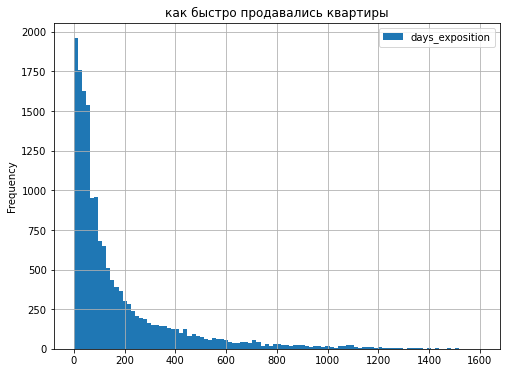

In [65]:
#Изучим, как быстро продавались квартиры, параметр показывает, сколько дней было размещено каждое объявление
data['days_exposition'].describe()
data.plot(y='days_exposition', kind='hist', bins = 100, grid = True, figsize =(8,6), range =(0,1600), title ='как быстро продавались квартиры')


In [66]:
data['days_exposition'].median()

85.0

In [67]:
data['days_exposition'].describe()

count    16192.000000
mean       170.137290
std        220.730159
min          1.000000
25%         35.000000
50%         85.000000
75%        209.250000
max       1572.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

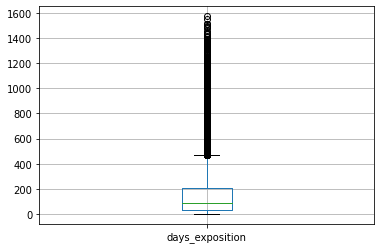

In [68]:
#определим пределы нормальной длительности продаж
data.boxplot('days_exposition')
#по формуле q3+1.5IQR получим верхнюю границу = 467

На гистограмме мы видим выбивающиеся(аномальные значения)-7,30,45,60,90.
Среднее значение -165. Медиана = 85.
Нормальные значения у нас лежат в диапазон от 0 до 467, поэтому аномально быстрыми продажами будут являться продажи до 0 дня, а аномально долгимим - дольше 467 дней.

0.6559866963737705

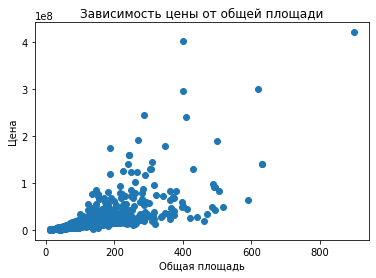

In [69]:
total_area_pivot_table=data.pivot_table(index = 'total_area', values = 'last_price', aggfunc='mean')
plt.scatter(total_area_pivot_table.index,total_area_pivot_table.values)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от общей площади')

data['total_area'].corr(data['last_price'])

0.5900822692273668

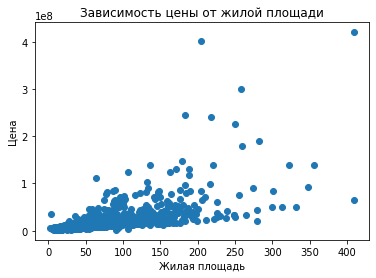

In [70]:
living_area_pivot_table=data.pivot_table(index = 'living_area', values = 'last_price', aggfunc='mean')
plt.scatter(living_area_pivot_table.index,living_area_pivot_table.values)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от жилой площади')

data['living_area'].corr(data['last_price'])

0.5209119174079543

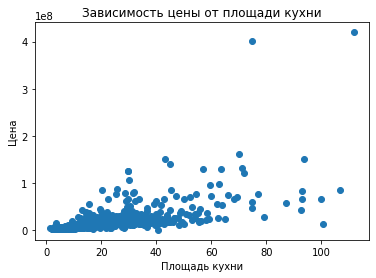

In [71]:
kitchen_area_pivot_table=data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc='mean')
plt.scatter(kitchen_area_pivot_table.index,kitchen_area_pivot_table.values)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади кухни')

data['kitchen_area'].corr(data['last_price'])

Text(0.5, 1.0, 'Зависимость цены от этажа')

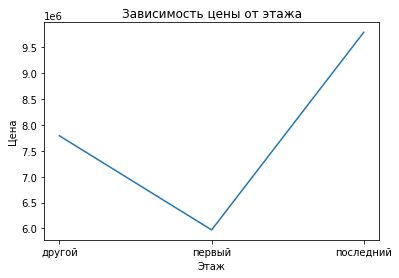

In [72]:
floor_category_pivot_table=data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc='mean')
plt.plot(floor_category_pivot_table.index,floor_category_pivot_table.values)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('Зависимость цены от этажа')


Text(0.5, 1.0, 'Зависимость цены от года')

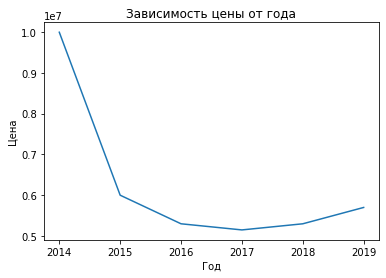

In [73]:
year_pivot_table=data.pivot_table(index = 'year_public', values = 'last_price', aggfunc='median')
plt.plot(year_pivot_table.index,year_pivot_table.values)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Зависимость цены от года')

Text(0.5, 1.0, 'Зависимость цены от месяца')

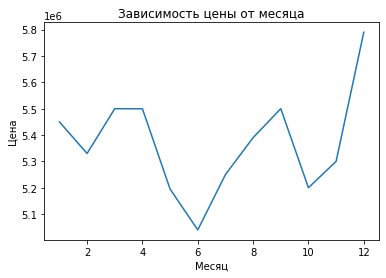

In [74]:
month_pivot_table=data.pivot_table(index = 'month_public', values = 'last_price', aggfunc='median')
plt.plot(month_pivot_table.index,month_pivot_table.values)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.title('Зависимость цены от месяца')

Text(0.5, 1.0, 'Зависимость цены от дня недели')

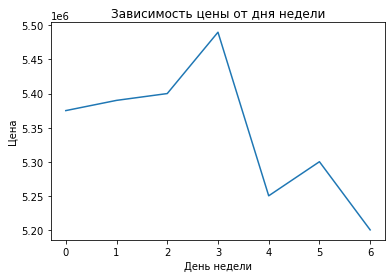

In [75]:
weekday_pivot_table=data.pivot_table(index = 'weekday_public', values = 'last_price', aggfunc='median')
plt.plot(weekday_pivot_table.index,weekday_pivot_table.values)
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.title('Зависимость цены от дня недели')

1.Зависимость стоимости от общей площади. Коэффициент корреляции = 0.6-средняя зависимость, прямая корреляция- чем больше общая площадь, тем больше стоимость.
2.Зависимость стоимости от жилой площади. Коэффициент корреляции = 0.56-средняя зависимость,прямая корреляция - чем больше жилая площадь,тем выше стоимость.
3.Зависимость стоимости от площади кухни. Коэффициент корреляции = 0.48-средняя зависимость, прямая корреляция-чем больше площадь кухни, тем выше стоимость.
4.Зависимость цены от категории этажа-чем выше этаж, тем выше стоимость, прямая корреляция.
5.Зависимость цены от года размещения.Гиперболическая корреляция-самой высокой стоимость на квартиры была в 2014 году, после,вплоть до 2017 года, стоимость снижалась, и , начиная с 2017-снова начала расти.
6.Зависимость стоимости от месяца-самые высокие цены на квартиры мы видим в декабре,январе, самые низкие-в начале лета(конец мая, июнь,начало июля)
7.Зависимость стоимости от дня недели. Самой высокой стоимость у квартир, размещенных в середине недели-в четверг, далее резко снижается, и самой низкой оказывается в воскресенье.

In [80]:
#Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
data['price_metr'] = data['last_price']/ data['total_area']
popular_places = data['locality_name'].value_counts().head(10)
popular_places_pivot_table = data.query('locality_name in (@popular_places.index)').pivot_table(index = 'locality_name', values = 'price_metr')
print(popular_places_pivot_table.sort_values(by='price_metr', ascending=False))


                    price_metr
locality_name                 
Санкт-Петербург  115802.866632
Пушкин           103131.171872
Стрельна          88267.456132
Петергоф          84757.559690
Павловск          84537.349196
Шушары            78551.344545
Колпино           75435.354070
Металлострой      73476.740172
Красное Село      72170.294411
Понтонный         70104.528056


В Санкт-Петербурге самые высокие цены за 1 квадрынй метр-в среднем 114658, наименьшей стоимотью за квадратный метр среди 10 населенных пунктов, имеющих больше всего объявлений обладает-Красное село(72170 за м^2). Самый дешевый квадратный метр из всех представленных нам населенных пунктов- Щеглово(52273 за м^2).

<AxesSubplot:xlabel='km_cityCenters'>

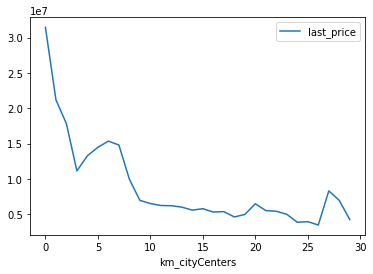

In [77]:
data['km_price']=data['last_price']/data['km_cityCenters']
piter_pivot_table = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_cityCenters', values = 'last_price', aggfunc = 'mean')
piter_pivot_table.plot()





Видим ожидаемую зависимость-чем дальше от центра, тем меньше стоимость.Стоимость за квадратный метр и, соответственно, за квартиру резко уменьшается от центра и до 9км, дальше стоимость уменьшается постепенно.


In [79]:
data = data.replace([np.inf], np.nan)
print(data['km_price'].mean())
#стоимость одного километра составляется 1202944

1314094.7818325374


### Общий вывод

Предобработка данных включила в себя :
-поиск пропущенных значений, выяснение их причины, заполнение, где это было возможно
-изменение типа данных в столбцах, при необходимости
-поиск неявных дубликатов с их заменой
-устранение редких и выбирающихся значений;
Были добавлены новые столбцы в датафрейм, которые показывают цену одного квадратного метра, день недели/месяц/год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.
  При исследовательском анализе данных сделаны следующие выводы:
1.Общая площадь колеблется от 14 до 900м^2. Средняя равна 60 м^2. 
2.Жилая площадь от 2 до 409м^2. Средняя равна 34м^2. Чаще всего встречаются квартиры с площадью 18 и 32м^2.
3.Площадь кухни от 1.3 до 112м^2. Средняя равна 10.4м^2. Чаще всего встречаются кухни с площадью 6, 8 ,9 и 10м^2.
4.Средняя стоимость на объекты 6.5 млн, имеются аномально низкие значения- минимальная стоимость объекта 12190
5.Количество комнат от 1 до 19, среднее количество комнат =2. Чаще всего встречаются квартиры с 1, 2 и 3 комнатами.
6.Потолки от 2.2м до 5.7м.Средняя высота 2.7, чаще всего встречаются объекты с высотой потолка 2.5м и 2.7м
7.Этаж квартиры от 1 до 33. Средний этаж 6. Чаще всего встречаются квартиры на 1,2,3,4,5 этажах
8.В данных по типу этажа квартиры мы видим 3 группы- 'первый', 'последний', 'первый', чаще всего квартиры располагаются не на 1 и не на последнем этаже, в нашем случае 16966 раз.
9.Количесвто этажей в доме от 1 до 60, среднее значение 10, чаще всего встречаются дома с 5,9,10 этажами.
10.Расстояние от квартиры до центра варьируется от 181 до 65968 метро,в среднем до центра города 14248 метров, чаще всего встречаются дома, от которых до центра от 10000 до 15000 метров.
11.Расстояние до ближайшего аэропорта от 6450 м до 84869 м, в среднем 28908м. Чаще всего квартиры встречаются на расстоянии 10 - 30км.
12.Расстояение до парка варируется от 1 до 3190 метров, в среднем-490 м, чаще всего квартиры удалены от парка на 400-600 м.
13.На гистограммах, отражающих день и месяц публикации объявления мы видим, что чаще объявления выкладывались в ноябре, феврале и марте,значения варируются от 964 до 2021 за каждый месяц. Чаще выкладывались объявления 2,3,4,12 числа,значения от258 до 859 для каждого дня месяца.

  Квартиры продаются в среднем за 165 дней, аномально быстрыми продажами можно считать те, которые состоялись меньше, чем за сутки, а аномально долгими можем счесть те, которые не состоялись более 467 дней.(выбивающееся количество дней(аномальные значения)-7,30,45,60,90, для такого количества дней с момента размещения характерен резкий объем продаж. 
Чем больше общая, жилая площадь и площадь кухни, высота этажа, тем больше стоимость.
размещения.Самой высокой стоимость на квартиры была в 2014 году, после,вплоть до 2017 года, стоимость снижалась, и , начиная с 2017-снова начала расти.
Самые высокие цены на квартиры мы видим в декабре,январе, самые низкие-в начале лета(конец мая, июнь,начало июля)
Самой высокой стоимость у квартир, размещенных в середине недели-в четверг, далее резко снижается, и самой низкой оказывается в воскресенье.
    
В Санкт-Петербурге самые высокие цены за 1 квадрынй метр-в среднем 114658, наименьшей стоимотью за квадратный метр среди 10 населенных пунктов, имеющих больше всего объявлений обладает-Красное село(72170 за м^2). Самый дешевый квадратный метр из всех представленных нам населенных пунктов- Щеглово(52273 за м^2).
Так же, чем дальше от центра, тем меньше стоимость.Стоимость за квадратный метр и, соответственно, за квартиру резко уменьшается от центра и до 9км, дальше стоимость уменьшается постепенно, стоимость 1 км составила 1202944.

Резюмируя -видно, что цена больше всего зависит от площади и количества комнат, есть некоторая сезонность, можно проследить зависимость расстояния до центра и цены. На каждый километр удаления видно среднюю стоимость квартир.
Средний срок продажи около полугода, а 50% продается в срок до 3 месяцев.
Было бы интересно понаблюдать за тем, как меняется стоимость в зависимости от количества балконов в квартире,удаленности от аэропорта,парка; отличается ли стоимость при разном количестве комнат, но одинаковой площади; влияет ли количество фото/время(месяц) публикации объявления на скорость продажи квартиры; и как отличаются по стоимости квартиры со свободной планировкой от квартир с планировкой от застойщика, при расположении в одном доме и одинаковой площадью. Существует ли какая-то тенденция(коэфициент удаленности от центра, если так можно назвать)-на сколько увеличивается стоимость квадратного метра в разных городах при удаленности от центра/других объектов(парки, аэропорты, водоемы) на одинаковое расстояние(является ли зависимость линейной или более сложной функией)